In [5]:
import matplotlib.pyplot
import pandas
import scipy.stats
import numpy

Chargement des données

In [7]:
df = pd.read_csv("genres_v2.csv",low_memory=False)

Informations diverses sur le DataSet

In [8]:
df.shape

(42297, 22)

In [11]:
df.count()

danceability        42297
energy              42297
key                 42297
loudness            42297
mode                42297
speechiness         42297
acousticness        42297
instrumentalness    42297
liveness            42297
valence             42297
tempo               42297
type                42297
id                  42297
uri                 42297
track_href          42297
analysis_url        42297
duration_ms         42297
time_signature      42297
genre               42297
song_name           21511
Unnamed: 0          20783
title               20780
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42297 entries, 0 to 42296
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42297 non-null  float64
 1   energy            42297 non-null  float64
 2   key               42297 non-null  int64  
 3   loudness          42297 non-null  float64
 4   mode              42297 non-null  int64  
 5   speechiness       42297 non-null  float64
 6   acousticness      42297 non-null  float64
 7   instrumentalness  42297 non-null  float64
 8   liveness          42297 non-null  float64
 9   valence           42297 non-null  float64
 10  tempo             42297 non-null  float64
 11  type              42297 non-null  object 
 12  id                42297 non-null  object 
 13  uri               42297 non-null  object 
 14  track_href        42297 non-null  object 
 15  analysis_url      42297 non-null  object 
 16  duration_ms       42297 non-null  int64 

In [14]:
list(df.columns)

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'genre',
 'song_name',
 'Unnamed: 0',
 'title']

In [15]:
list(df)

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'genre',
 'song_name',
 'Unnamed: 0',
 'title']

### Statistiques descriptives univariés¶
La fonction describe() permet de décrire toutes les variables quantitatives d'un jeu de données directement.

In [16]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000,42297.000000
mean,0.639366,0.762529,5.370074,-6.465175,0.549472,0.136542,0.096147,0.283101,0.214078,0.357119,147.470856,250884.766981,3.972575
std,0.156623,0.183826,3.666196,2.941244,0.497552,0.126146,0.170832,0.370806,0.175581,0.233204,23.843716,102954.448709,0.268367
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179853.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005960,0.135000,0.322000,144.972000,224771.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.106000,0.722000,0.294000,0.522000,161.446000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


<AxesSubplot:ylabel='Frequency'>

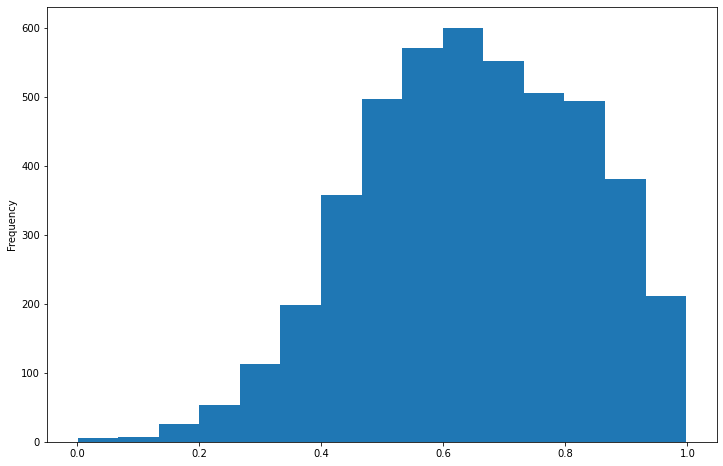

In [39]:
df[df["genre"] == "Dark Trap"]['energy'].plot.hist(bins = 15,figsize =(12,8))

In [87]:
import matplotlib.pyplot as plt
genre =np.unique(df['genre'])
def plot_hist (param) : 
    fig , ax = plt.subplots(1,1,figsize=(10,10),)
    for gen in np.unique(df['genre']) : 
        ax.hist(df[df["genre"] == gen][param] ,bins = 10 ,density= True, alpha = 0.4, label = gen)
        s =('Histogramme du feature : ' + param) 
        plt.title( s, fontsize=15)
    plt.legend()

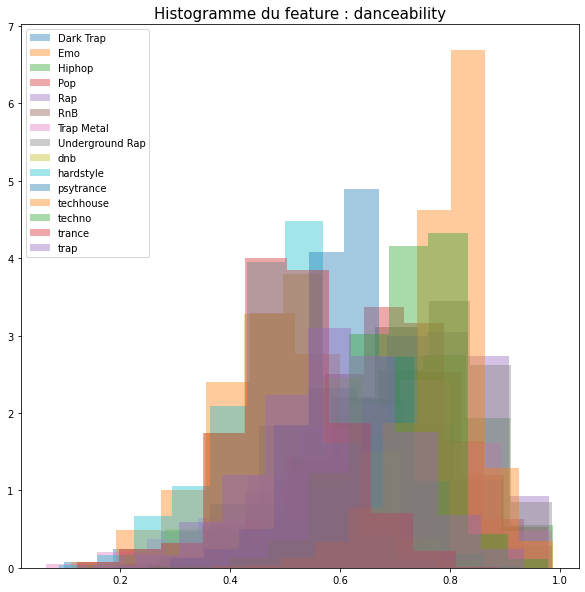

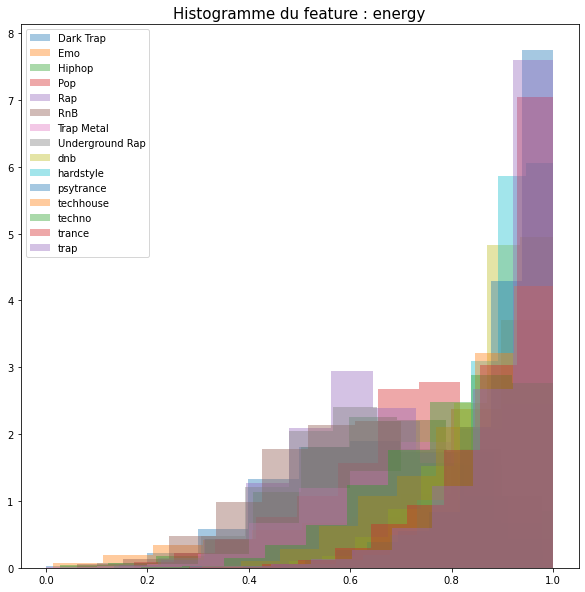

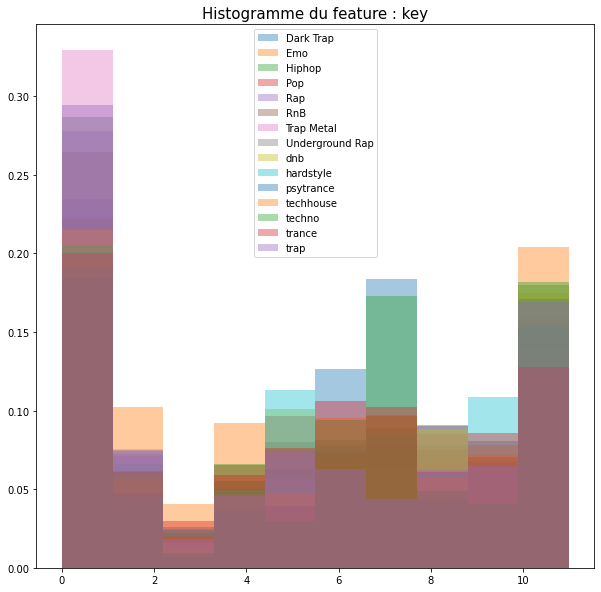

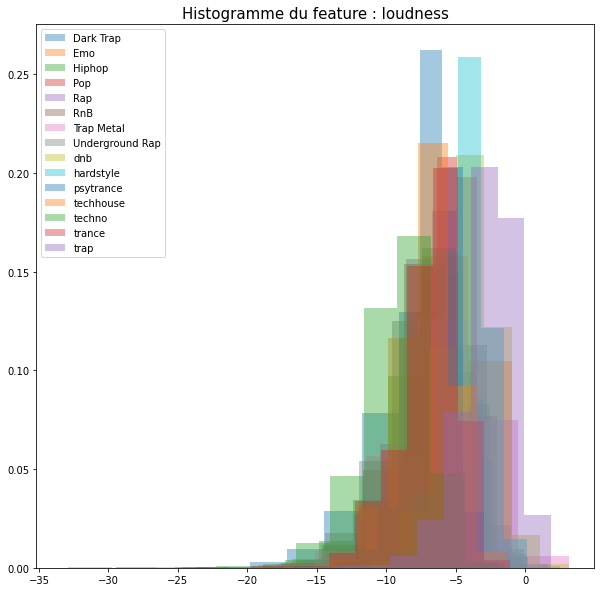

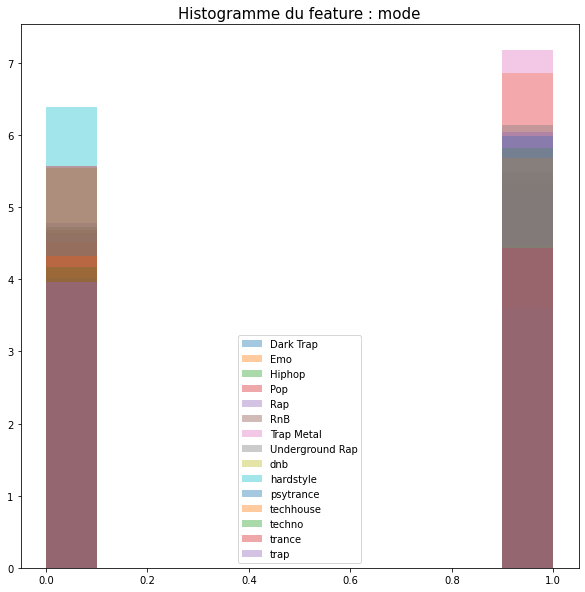

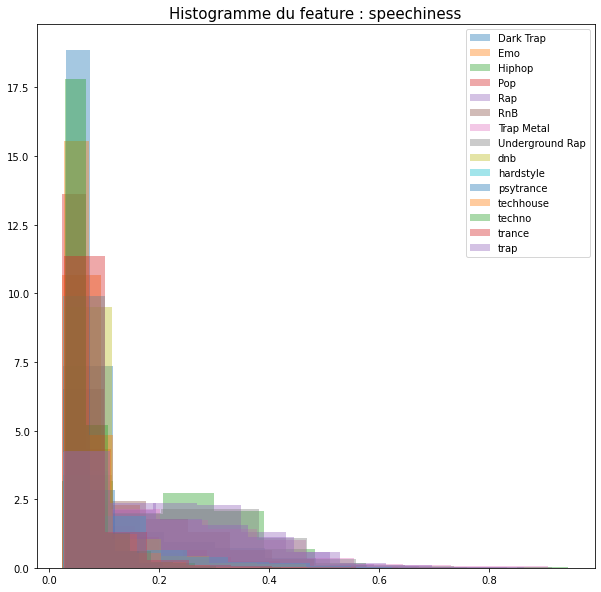

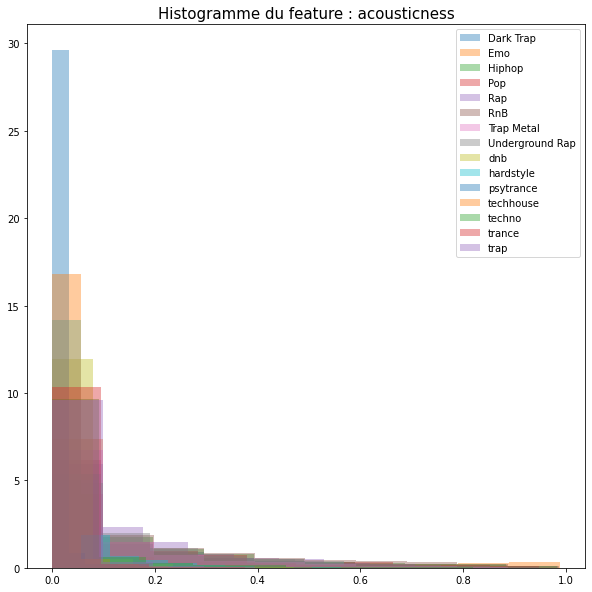

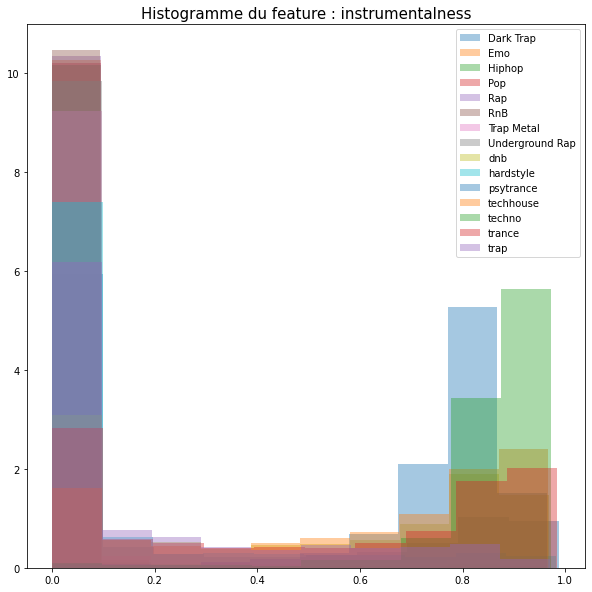

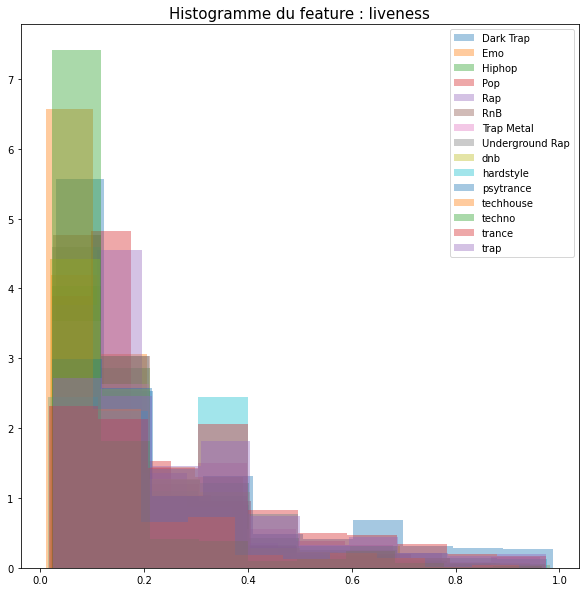

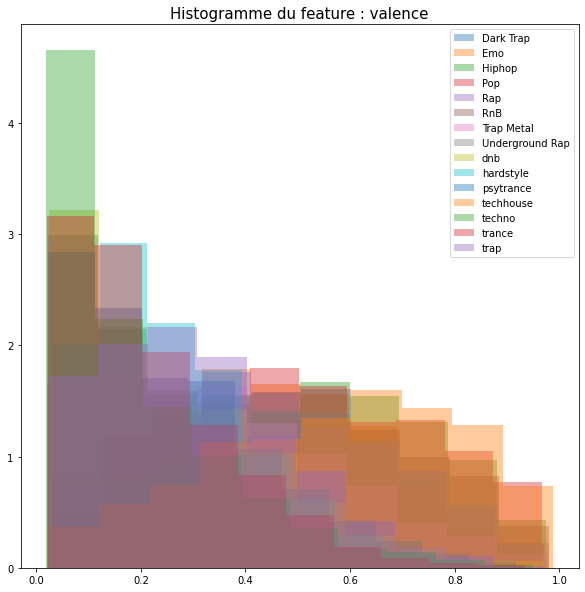

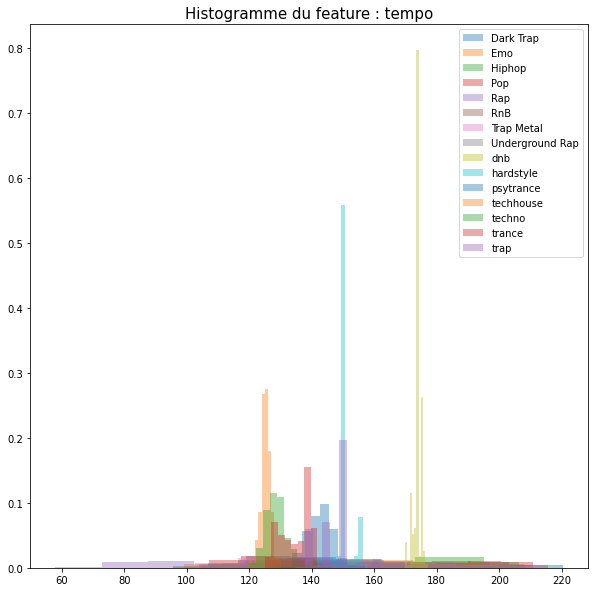

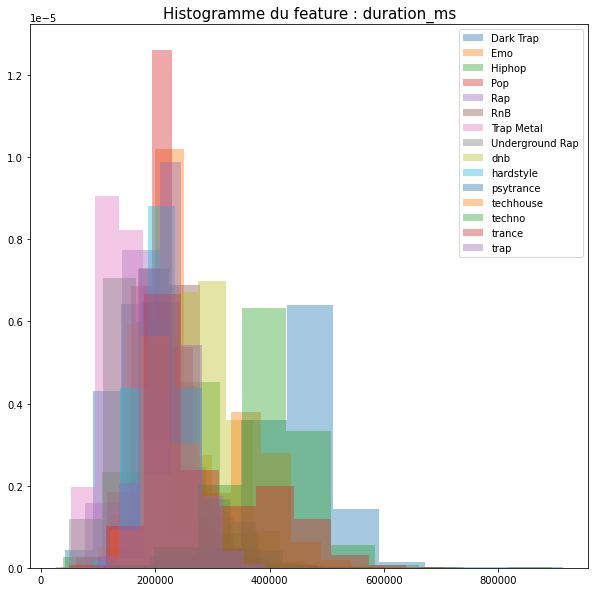

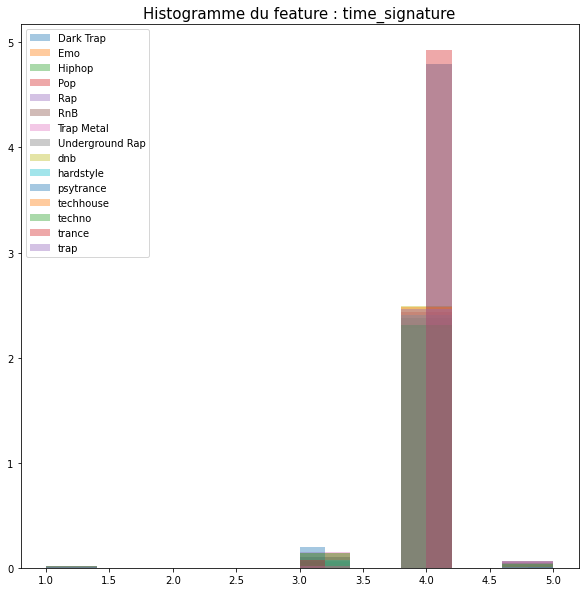

In [88]:
param = ["danceability", "energy" ,"key" ,"loudness", "mode" , "speechiness" ,"acousticness" ,"instrumentalness" ,"liveness" ,"valence" ,"tempo" ,"duration_ms" ,"time_signature"]
for i in param : 
    plot_hist(i)


***Qualitative***

Pour les variables qualitatives, il y a plusieurs façons de faire pour obtenir la table d'occurences (ou des effectifs), ainsi que la table des proportions des modalités. et la variable qui nous intersse le plus c'est la variable genre qui reprsente notre variable predective 



In [100]:

df['genre'].describe()

count               42297
unique                 15
top       Underground Rap
freq                 5875
Name: genre, dtype: object

In [101]:
df['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [103]:
pd.crosstab(df['genre'], "freq")

col_0,freq
genre,
Dark Trap,4572
Emo,1680
Hiphop,3027
Pop,461
Rap,1848
RnB,2099
Trap Metal,1955
Underground Rap,5875
dnb,2966



**Diagramme en barres**

Ensuite, pour réaliser un diagramme en barres, nous utilisons le type "bar" pour plot(). Les calculs de proportions précédents nous permettent d'afficher une représentation des proportions plutôt que des effectifs.


<AxesSubplot:xlabel='genre'>

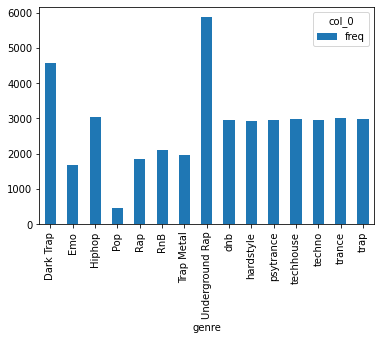

In [105]:


t = pandas.crosstab(df['genre'], "freq")
t.plot.bar()


array([<AxesSubplot:ylabel='freq'>], dtype=object)

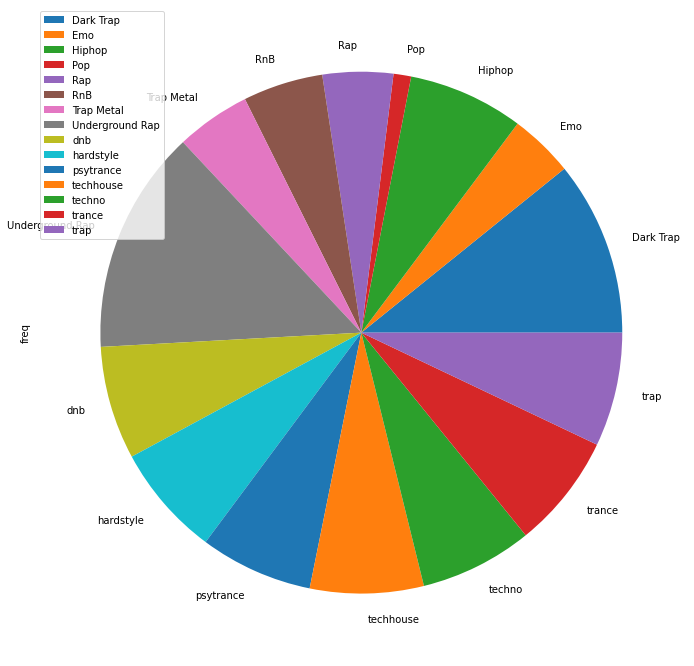

In [109]:
t = pandas.crosstab(df['genre'], "freq")
t.plot.pie(subplots=True, figsize = (12, 12))

### Statistiques descriptives bivariées

array([[<AxesSubplot:xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot:xlabel='energy', ylabel='danceability'>,
        <AxesSubplot:xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot:xlabel='speechiness', ylabel='danceability'>,
        <AxesSubplot:xlabel='acousticness', ylabel='danceability'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='danceability'>,
        <AxesSubplot:xlabel='liveness', ylabel='danceability'>,
        <AxesSubplot:xlabel='valence', ylabel='danceability'>,
        <AxesSubplot:xlabel='tempo', ylabel='danceability'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='danceability'>],
       [<AxesSubplot:xlabel='danceability', ylabel='energy'>,
        <AxesSubplot:xlabel='energy', ylabel='energy'>,
        <AxesSubplot:xlabel='loudness', ylabel='energy'>,
        <AxesSubplot:xlabel='speechiness', ylabel='energy'>,
        <AxesSubplot:xlabel='acousticness', ylabel='energy'>,
        <AxesSubplot:xlabel='instrumentalnes

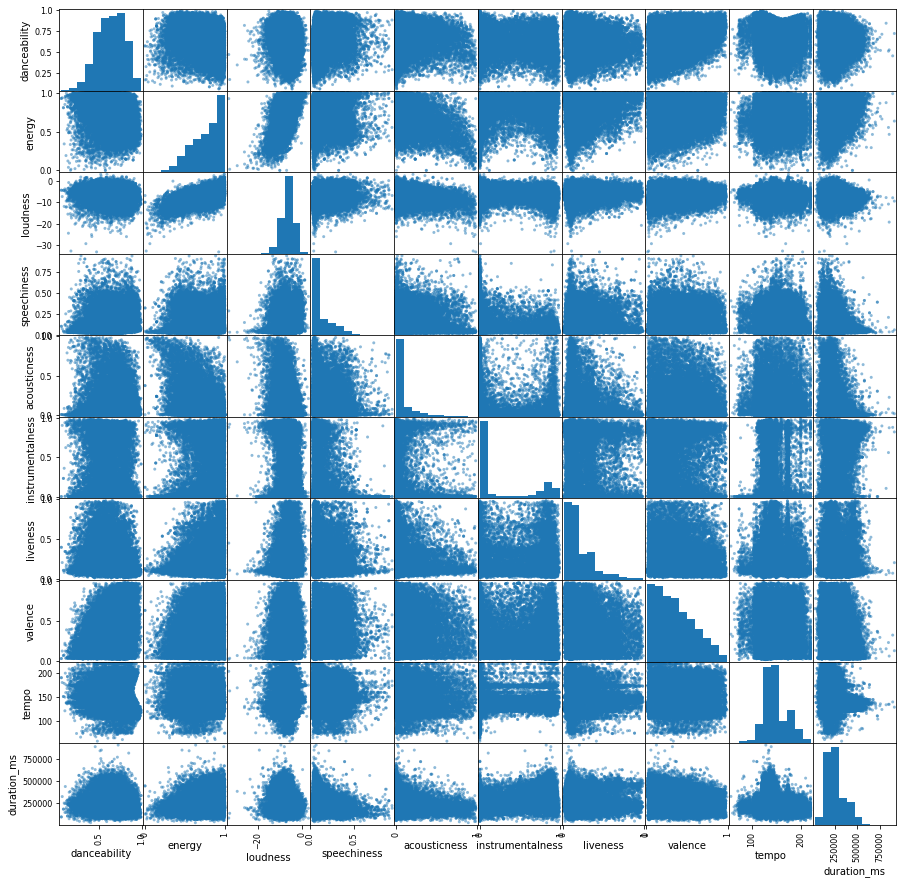

In [121]:
pd.plotting.scatter_matrix(df[['danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']] , figsize = (15,15))

<AxesSubplot:title={'center':'energy'}, xlabel='genre'>

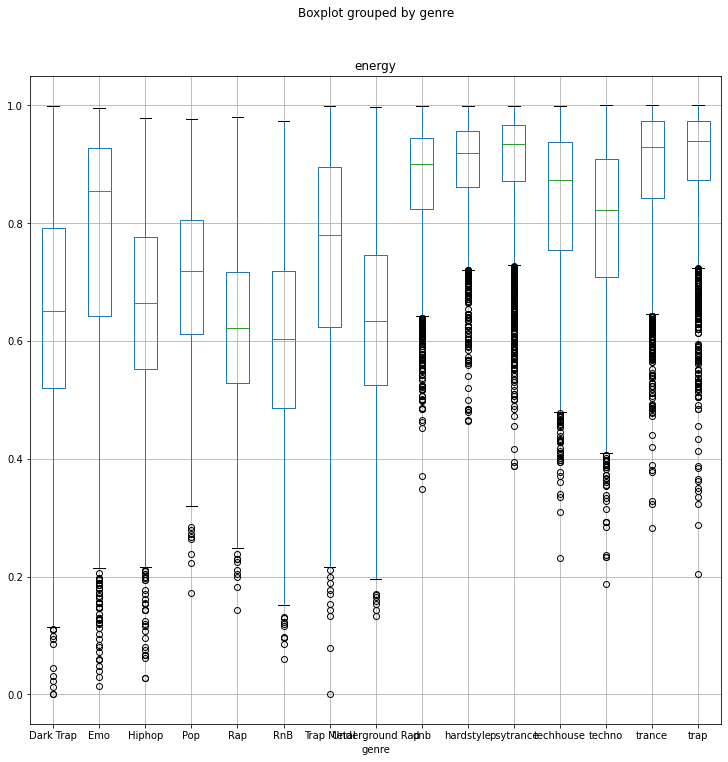

In [126]:


df.boxplot(column = "energy"  , by = "genre", figsize=(12,12)) 



In [134]:
genre =np.unique(df['genre'])
def plot_BM (param) : 
    for p in param : 
        df.boxplot(column = p, by = "genre" , figsize = (15,8)) 

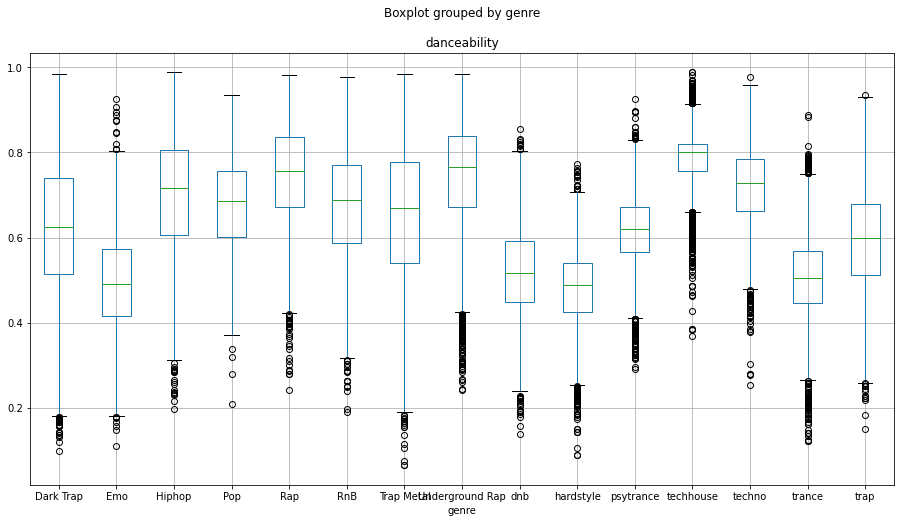

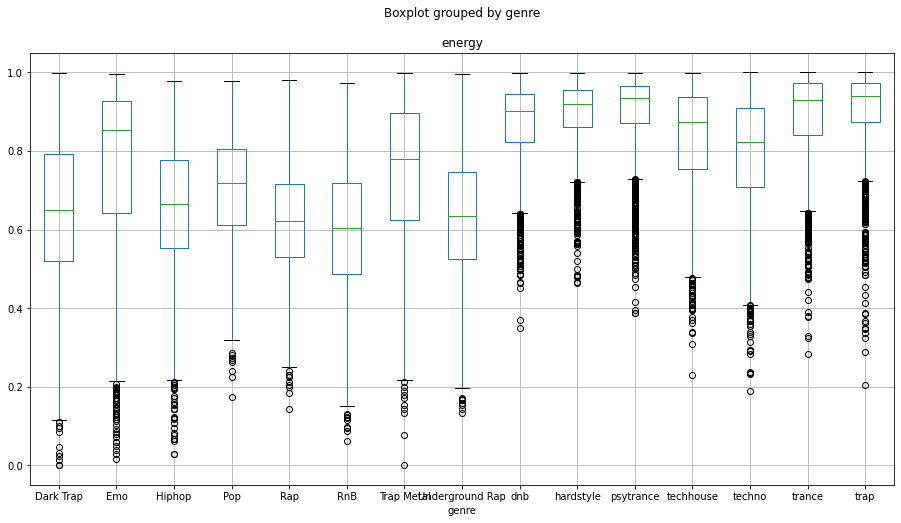

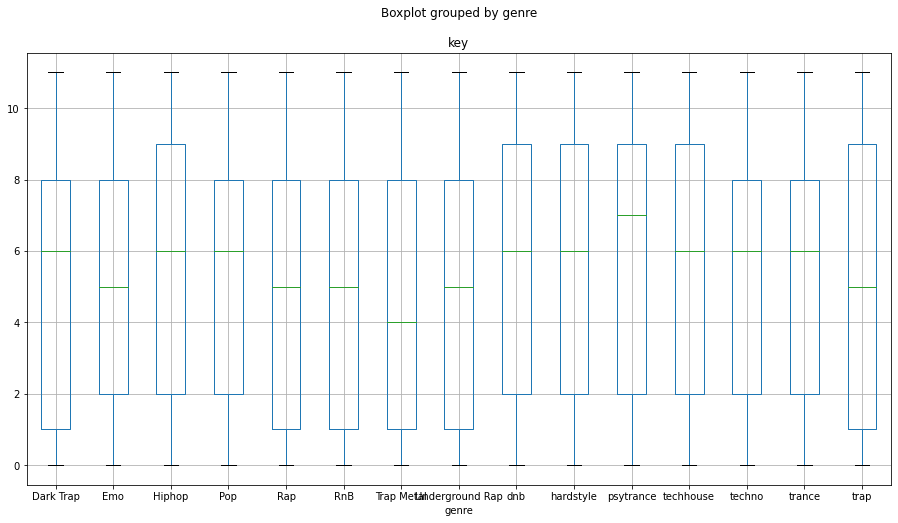

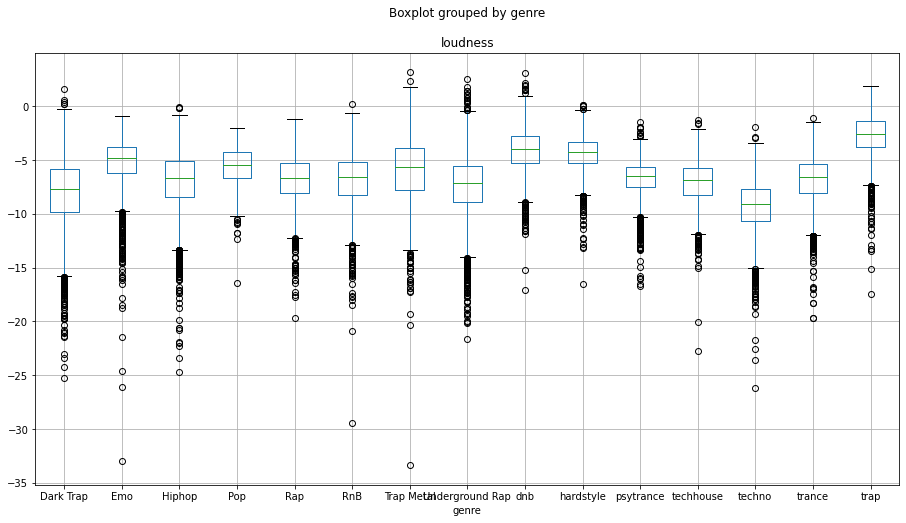

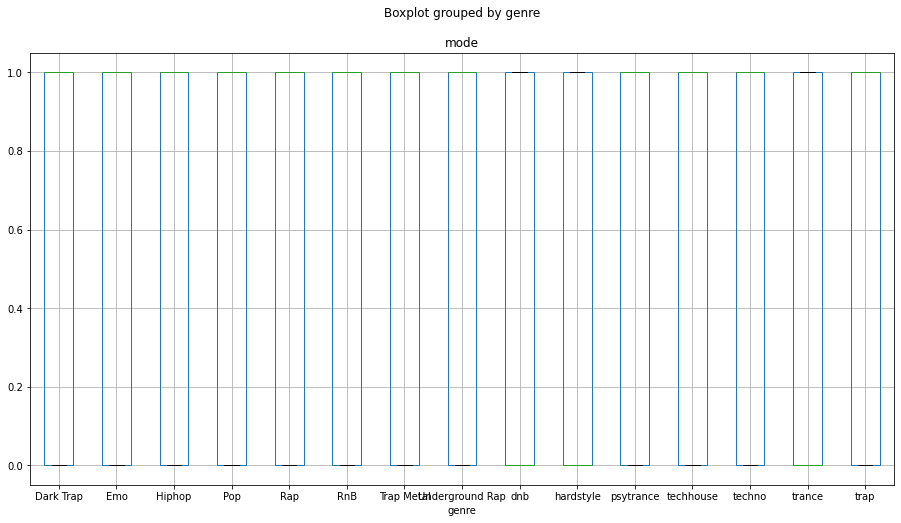

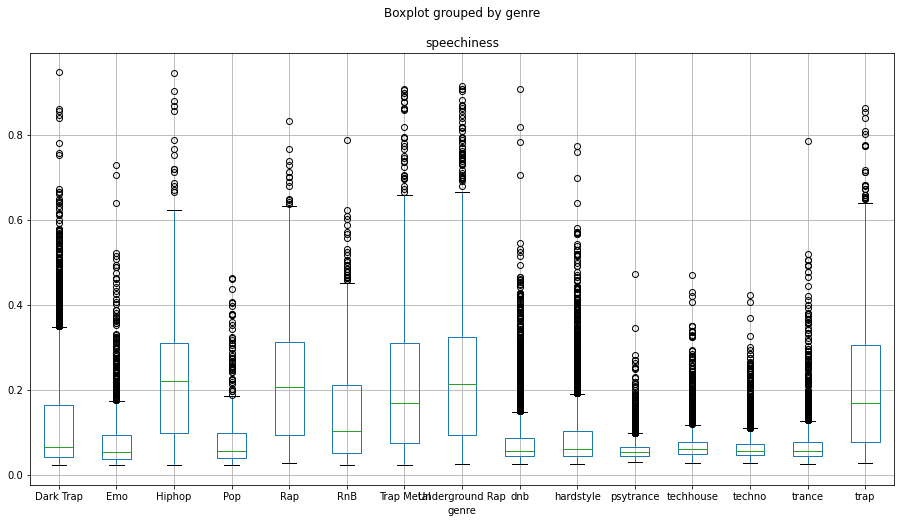

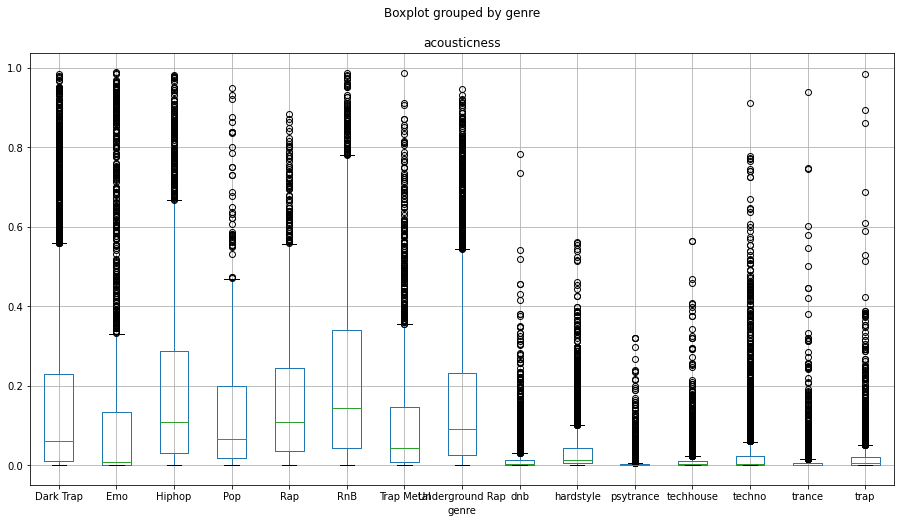

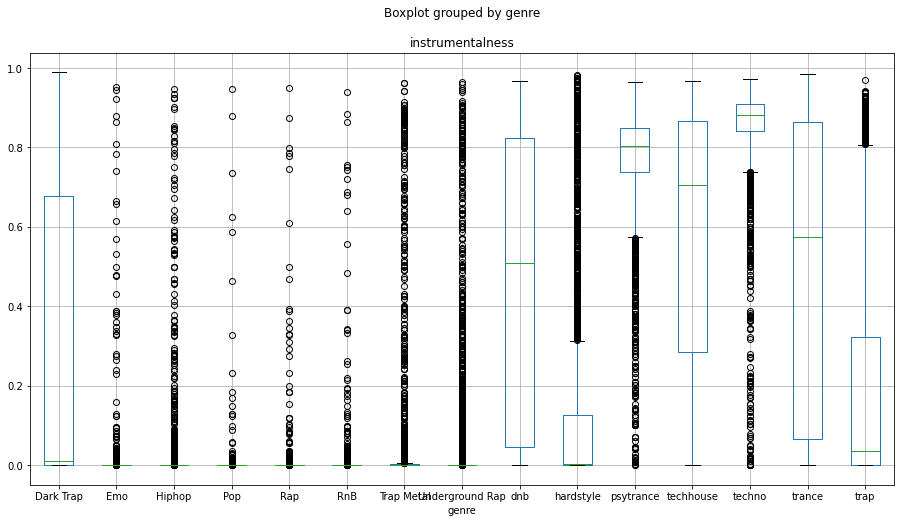

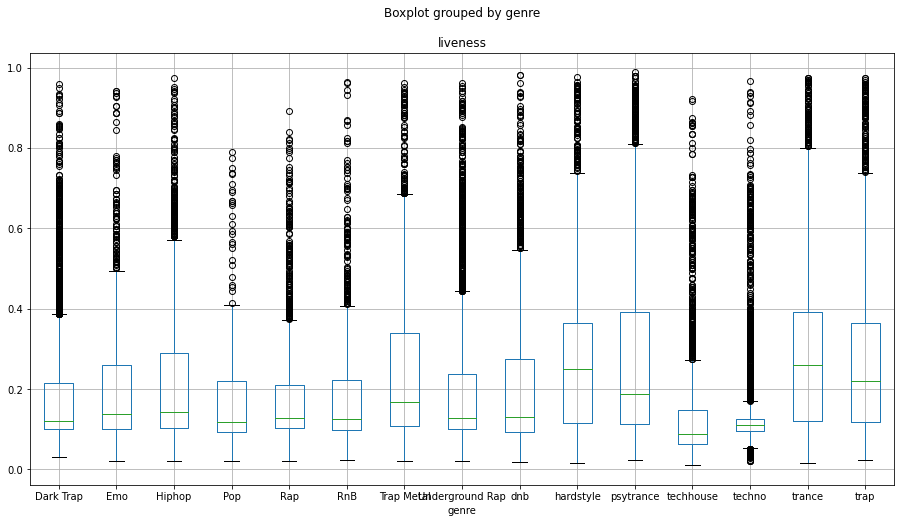

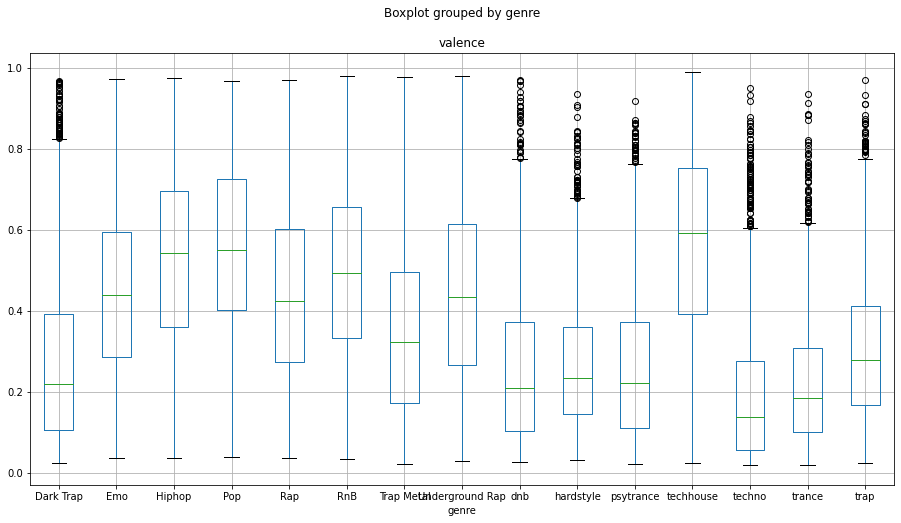

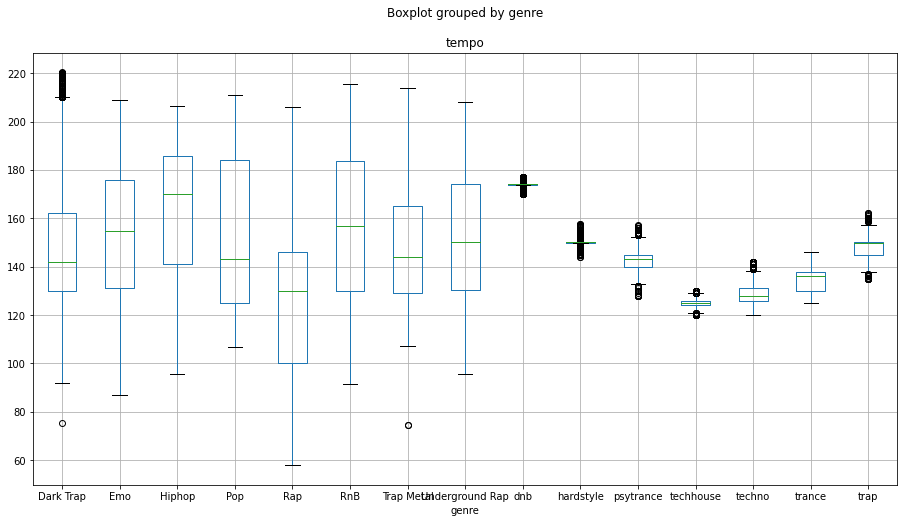

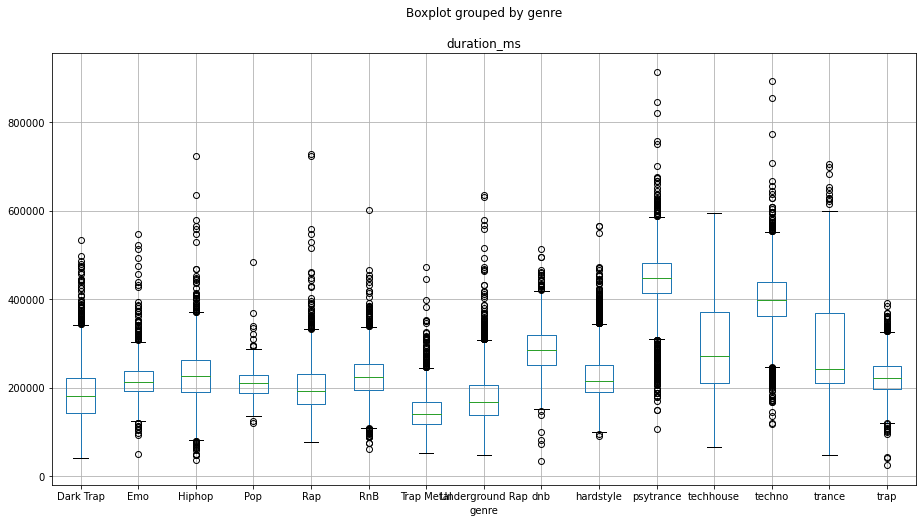

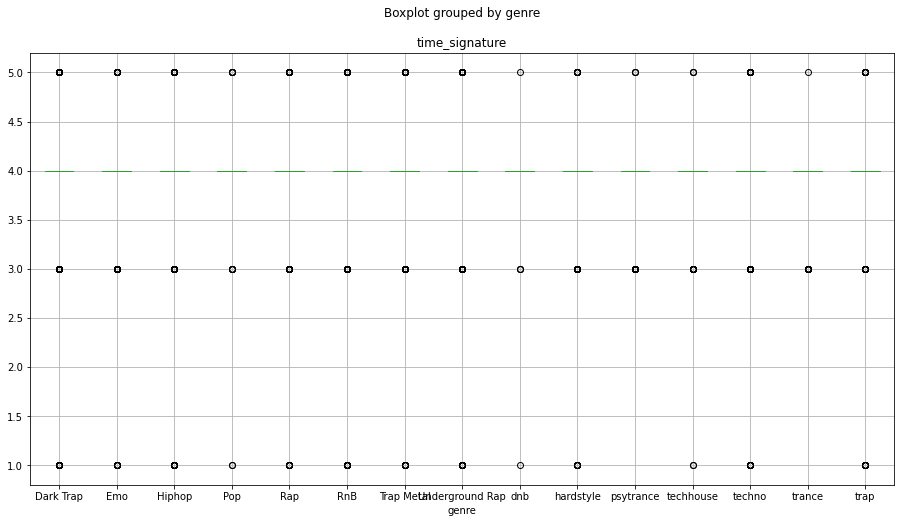

In [135]:
 plot_BM (param)